# What to Watch?

Debido a la pandemia el profesor Alexander no ha tenido tiempo de ver peliculas. Sin embargo, ya que el semestre llegará a su fin dentro de poco, el quisiera tener un sistema de recomendación que le indique que peliculas le podrian gustar. Para esto pensó que, como sus estudiantes de Machine Learning tienen conocimiento de diferentes técnicas de aprendizaje no supervisado, sería una buena oportunidad para evaluar sus conocimiento en esta area.

El profesor encontro una base de datos de ratings de peliculas, la descripción pueden encontrala [aquí](https://grouplens.org/datasets/movielens/100k/), y los archivos estan adjuntos en la carpeta del taller. Esta base de datos cuenta con la calificación de 943 usuarios a 1682 peliculas, en total se dispone de mil califiicaciones (entre 0 y 5). Ademas de la lista que relaciona al usuario con la pelicula y el rating dado, el profesor cuenta con información sobre el genero al que pertenece la pelicula (una clasificación de 19 generos diferentes), asi mismo como información relacionada con edad, sexo, y profesion de los diferents usuarios.

Para este ejercicio el profesor Alexander no quiere probar solamente el conocimiento de sus estudiantes en el desarrollo de sistemas de recomendación, sino en el uso de diferentes tecnicas de aprendizaje no supervisado. Por lo tanto se deben emplear diferentes técnicas de las vistas en clase. Para este proyecto el profesor cuenta con la siguiente información en diferentes archivos de excel:

1. **u_data_ratings.xls**: rating de peliculas asignado por un usuario a una pelicula especifica.
2. **u_movies_genre.xls**: enumeración de los 20 diferentes generos de peliculas incluidos en la base de datos.
3. **u_movies_items.xls**: un archivo que contiene información relacionada con cada una de las peliculas.
5. **u_user_info.xls**: información relacionada a los usuarios.

Para el desarrollo de este ejercicio el profesor Alexander pide lo siguiente:

1. Desarrollar un sistema de recomendación de peliculas basado en la información proporcionada.
2. Realizar un analisis y descripción de la información presentada utilizando herramientas de aprendizaje no supervisado. ¿Qué puede decir de los datos y su distribución?, ¿qué grupos pueden encontrar?, ¿qué indican esos grupos?, etc...

¿Qué se debe entregar?

1. Analisis de la información presentada. ¿Qué se puede inferir de los datos?
2. Implementación y explicación del sistema de recomendación. Análisis de los resultados del sistema de recomendación utilizando un ejemplo.
3. ¿Cómo puedo evaluar que peliculas le podrian gustar a un usuario nuevo (que no este en la base de datos) basado en las calificaciones que este da a una serie de peliculas?
4. Análisis sobre como incorporar toda la información otorgada.
5. ¿Qué se puede inferir sobre los diferentes usuarios y sus gustos en peliculas? se puede encontrar alguna relación entre edad, profesión, sexo y genero de peliculas que les gusta a estos grupos? ¿Cómo se podria obtener esta información?
6. Durante el desarrollo de cada uno de los puntos del taller indique los métodos utilizados y explique la forma como los utiliza.
7. Una discusión sobre el desarrollo del proyecto, los metodos utilizados, posibles mejoras, etc..

# Paint it

El profesor Alexander, además de dedicarse a Netflix en sus vacaciones, quiere también retomar su interes por el arte. Para esto el requiere que los estudiantes de Machine Learning le colaboren con sus conocimientos en cuantización de Color. Debido a la pandemia el profesor no ppuede salir a comprar pinturas, y su paleta de colores es bastante limitada, menos de 20 tonos. Por esta razón, el profesor pide que utilicen las obras de arte que se adjuntan en la carpeta de imágenes, y realicen un proceso de cuantización de color con mapas autoorganizados. Para este proceso deben seguir tener en cuenta:

1. ¿Cuantos colores van a utilizar?
2. ¿Cuál es la mejor pintura que el profesor podria realizar con los colores que ustedes proponen?
3. Mostrar como se verian las pinturas utilizando solamente la limitada paleta de la cual dispone el profesor.
4. Para este taller podemos utilizar la libreria simpSOM, domumentación sobre la libreria pueden encontrarla [aquí](https://github.com/fcomitani/SimpSOM). O esta otra que esta implementada en Python, pero basada en la libreria de MATLAB [aquí](https://github.com/sevamoo/SOMPY).


Ademas el profesor pide que ocntesten las siguientes preguntas:

1. ¿Esta agusto con la cuantización relaizada?
2. ¿Cómo puede mejorar lso resultados?
3. Describa brevemente que han hecho los mapas autoorganizados. Puede usar figuras, gráficas, etc para complementar esta respuesta.
4. ¿Qué problemas tuvo a la hora de realizar esta parte del proyecto?


Finalmente, el profesor Alexander les pide que entreguen el notebook de jupyter con el material de apoyo necesario, el código documentado con el análisis de cada una de las partes, y las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Número_de_grupo_No_Supervisado.

Recuerde colocar los nombres de los participantes al comienzo del notebook que entregan.

Nota: Recuerden que tienen hasta el **Domingo 31 de Octubre** a las 12 de la noche para entregar sus notebooks. Mucha suerte!!




### Solución:
-Realizado por: Giancarlo Gonzalez 


-link del repositorio: https://github.com/GiancarloGonzalez2001/Proyecto_3_ML.git

## Sitema de recomendación

In [117]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn import preprocessing

Se abren los Excel que contiene la información de las calificaciones de los usuarios a las películas, la información sobre cada uno de los usuarios y por ultimo la información acerca de cada una de la películas. Se crean tres DataFrame para manejar los datos 

In [177]:
data = pd.read_excel(r'data/u.xlsx', sheet_name = 'u')
user = pd.read_excel(r'data/u_user.xlsx', sheet_name = 'u')
movie = pd.read_excel(r'data/u_items.xlsx', sheet_name = 'u')
data_movie = movie.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
data_movie = pd.DataFrame(data_movie,columns=["unknown","Action","Adventure","Animation","Children's","Comedy","Crime"
                                             ,"Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance"
                                             ,"Sci-Fi","Thriller","War","Western"])
data_user = user.iloc[:, [1,2,3]].values
data_user = pd.DataFrame(data_user,columns=["Age","Gender","Ocupation"])
data_movie

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Se empieza agrupando cada una de las películas de acuerdo con su género utilizando k-means. 
Pero antes se usa el criterio del codo para ver el mejor número de clusters de acuerdo a la información 


C:\Users\gianc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  f"KMeans is known to have a memory leak on Windows "


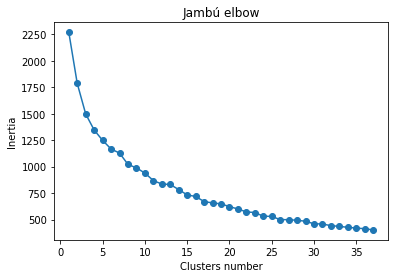

In [155]:
# number clusters 
inercia = []
for i in range(1,38):
    k_means = KMeans(n_clusters =i , max_iter = 450)
    k_means.fit(data_movie)
    inercia.append(k_means.inertia_)
plt.title("Jambú elbow")
plt.ylabel("Inertia")
plt.xlabel("Clusters number")
plt.plot(range(1,38),inercia,marker='o')

Se utiliza el método de PCA para hacer la reducción de dimensionalidad de la matriz que contiene toda la información sobre el género de la película y el cluster al que pertenece.

In [161]:
# Object creation
k_means = KMeans(n_clusters = 18 , max_iter = 450)
k_means.fit(data_movie)
data_movie['Clusters']=k_means.labels_
#PCA
pca = PCA(n_components=2)
pca_movie = pca.fit_transform(data_movie)
pca_movie = pd.DataFrame(pca_movie, columns=['component_1','component_2'])
pca_cluster_movie = pd.concat([pca_movie,data_movie[['Clusters']]],axis=1)
pca_cluster_movie

,component_1,component_2,Clusters
0,5.469684,0.768903,11
1,9.509580,-0.124797,15
2,6.482732,-0.094764,12
3,4.452161,-0.036561,10
4,7.467999,-0.905933,13
...,...,...,...
1677,-4.554472,-0.534852,1
1678,6.481378,-0.021037,12
1679,3.434554,-0.608388,9
1680,-1.529864,0.803823,4


Se grafican los datos de acuerdo a su cluster y se evalúa el nivel de precisión del algoritmo k-means.


Coeficiente de la cilueta: 0.690


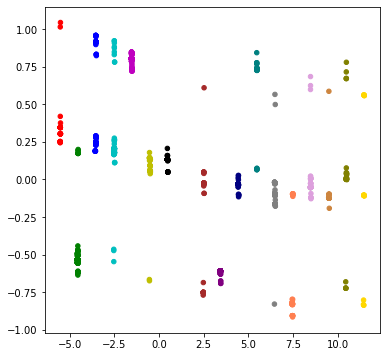

In [163]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

color = np.array(['r','g','b','c','m','y','k','w','brown','purple','navy','teal','gray','coral','plum','peru','olive','gold','lime'])
ax.scatter(x = pca_cluster_movie.component_1,y = pca_cluster_movie.component_2, c = color[pca_cluster_movie.Clusters],s=20)
# Model accuracy
print ("\nCoeficiente de la cilueta: %0.3f" % silhouette_score(data_movie,
k_means.labels_, metric='euclidean'))

Matriz donde a cada fila representa a los usuarios que calificaron alguna película, las columnas representan el ID de cada película y el valor es puntuación asignada por cada usuario a la película que evaluó. 

In [4]:
matriz = np.zeros((944,1683))
matriz.shape

(944, 1683)

In [142]:
for i in range(100000):
    fila = data.iloc[i]
    posx =fila[0]
    posy =fila[1]
    dato =fila[2]
    matriz[posx][posy]=int(dato)
M = pd.DataFrame(matriz)
M

,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dada la matriz anterior se utiliza el método de factorización de matrices para para obtener la matriz que me resuma la información sobre el genero de película favorito de cada usuario de acuerdo a las puntuaciones asignadas. 
No se calcula H ya que si hace la relación del género de cada película a partir de la matriz anterior esta inferencia seria errónea ya que no hay relación alguna porque solo es sobre la puntiación de los usuarios. 

In [164]:
nmf = NMF(19)
nmf.fit(matriz)

C:\Users\gianc\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\gianc\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF(n_components=19)

Se obtiene la matriz que infiere el genero de película preferido de cada usuario.

In [166]:
# Fila: Usuario
# Columna: Genero de pelicula favorito
W = pd.DataFrame(np.round(nmf.transform(matriz),2), columns=H.index)
W.index = matriz.index
print("Matriz que relaciona a un usuario con un genero de pelicula prefereido: ")
print(W)
# obtenemos el genero de pelicula preferido por el usuario  
maxs=W.idxmax(axis=1)
maxs = pd.DataFrame(maxs)
print("Maximo de cada fila: \n",maxs)

Matriz que relaciona a un usuario con un genero de pelicula prefereido: 
       0     1     2     3     4     5     6     7     8     9     10    11  \
0    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1    1.76  0.44  0.15  2.26  0.55  0.21  0.90  0.13  0.00  0.85  0.07  0.06   
2    0.22  0.00  0.19  0.00  0.86  0.00  0.00  0.11  0.00  0.00  0.46  0.00   
3    0.00  0.00  0.00  0.53  0.00  0.10  0.00  0.00  0.06  0.04  0.63  0.00   
4    0.00  0.00  0.10  0.00  0.00  0.49  0.00  0.00  0.00  0.86  0.30  0.00   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
939  0.00  0.00  1.08  0.06  0.26  0.00  0.00  0.02  0.00  0.22  0.00  0.06   
940  0.00  0.69  0.00  0.00  0.22  0.00  0.38  0.24  0.00  0.00  0.71  0.08   
941  0.00  0.09  0.39  0.00  0.34  0.00  0.00  0.00  0.00  0.00  0.05  0.00   
942  0.00  0.59  0.00  0.00  0.00  0.00  0.00  0.26  0.00  0.15  0.58  0.61   
943  0.00  0.00  0.26  0.00  0.09  0.00  0.81  0.59  0.00 

Se crea una nueva matriz que tenga los datos más relevantes para hacer los clusters de los usuarios teniendo en cuenta su edad, sexo,ocupación y genero de película preferido. 

In [179]:
data_user.insert(3,"movie type",maxs)
ids = range(1,22)
data_user['Gender']=data_user['Gender'].replace(['M','F'],[1,0])
data_user['Ocupation']=data_user['Ocupation'].replace(['administrator','artist','doctor','educator','engineer','entertainment',
                                                       'executive','healthcare','homemaker','lawyer','librarian','marketing',
                                                       'none','other','programmer','retired','salesman','scientist'
                                                      ,'student','technician','writer'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14
                                                                                        ,15,16,17,18,19,20,21])
data_user

,Age,Gender,Ocupation,movie type
0,0,0,0,0
1,24,1,20,3
2,53,0,14,13
3,23,1,21,16
4,24,1,20,16
...,...,...,...,...
939,26,0,19,2
940,32,1,1,10
941,20,1,19,17
942,48,0,11,11


C:\Users\gianc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "


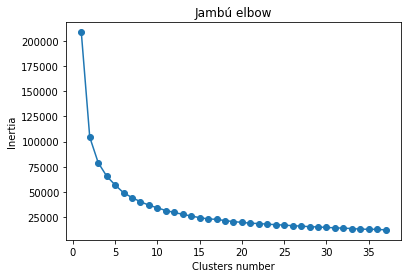

In [180]:
# number clusters 
inercia = []
for i in range(1,38):
    k_means = KMeans(n_clusters =i , max_iter = 450)
    k_means.fit(data_user)
    inercia.append(k_means.inertia_)
plt.title("Jambú elbow")
plt.ylabel("Inertia")
plt.xlabel("Clusters number")
plt.plot(range(1,38),inercia,marker='o')


Obtenemos la similitud de cada usuario a partir de toda la información suministrada en los Excel y la encontrada anteriormente, con esto hacemos la agrupación de los usuarios.

In [181]:
# Object creation
k_means = KMeans(n_clusters = 18 , max_iter = 450)
k_means.fit(data_user)
data_user['Clusters']=k_means.labels_
k_means.labels_


array([13,  5, 10,  8,  6,  4,  7, 14,  7,  1, 10, 12,  9, 16, 15,  2, 13,
        9, 12, 11, 11,  1,  6,  3, 17, 11,  2, 12,  1, 12,  8, 17,  6,  8,
        7, 17,  8,  8,  9,  7, 12, 11, 17,  1,  1,  1,  9, 10, 16,  5,  5,
       17,  5,  9, 13, 12,  9,  5,  1, 16, 16, 11, 17,  1,  3,  2,  8,  8,
        8, 17, 17, 12,  2,  6, 12, 13,  5,  6, 17,  7,  7,  8, 10,  4, 11,
       16, 13, 16, 10,  7, 14, 10,  3, 16,  1,  3, 17, 16, 16,  5, 11,  5,
       12,  1,  1, 17,  0, 12,  2,  9,  8, 14,  9,  2,  9,  3, 11,  5, 13,
        4, 15,  2,  6, 16,  4,  1,  1,  4,  1,  4,  8, 14,  9, 16,  9,  8,
       10,  2, 16,  5,  6, 15,  5, 12, 10,  3, 16, 11, 11,  4, 17,  7,  3,
        6,  6,  9, 17, 14, 16,  5,  1, 10, 17, 16,  2,  5,  2, 12, 10, 10,
        2, 16,  0,  0,  3,  6,  6,  5,  9, 17, 17, 13,  4,  4, 12, 10,  7,
        3, 12,  3,  3,  3,  7,  6,  7, 12, 10, 10,  5,  6, 12,  1, 11,  6,
        2, 10,  8,  4, 16,  7, 11,  0,  2, 11,  1, 12, 17,  8,  7,  9,  9,
        5,  1,  5,  3,  2

Se usa PCA para hacer la reducción de dimensionalidad de la matriz a así poder ver la información en una grafica y la idea también era relacionarla con los géneros de las películas que también esta etiquetados con un cluster de 1 a 19 pero no me garantizan que el cluster 3 del género acción por ejemplo coincida con el usuario que tiene el cluster 3 y que le gusta el genero acción.  

In [182]:
pca = PCA(n_components=2)
pca_user = pca.fit_transform(data_user)
pca_user = pd.DataFrame(pca_user, columns=['component_1','component_2'])
pca_cluster = pd.concat([pca_user,data_user[['Clusters']]],axis=1)
pca_cluster

,component_1,component_2,Clusters
0,-29.612898,-17.650160,13
1,-11.955100,6.980722,5
2,18.030999,4.058248,10
3,-12.804907,2.368018,8
4,-11.780746,2.854421,6
...,...,...,...
939,-10.154533,9.007130,1
940,0.213875,-6.755686,3
941,-15.215263,-0.195116,8
942,13.910055,1.065352,10


Se grafica y muestra el nivel de precisión del algoritmo.


Coeficiente de la cilueta: 0.407


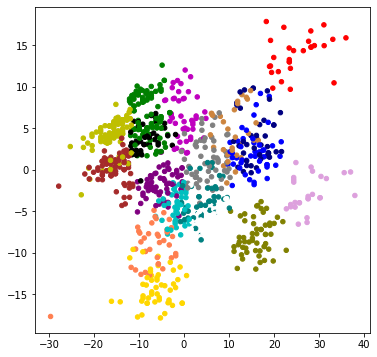

In [183]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

color = np.array(['r','g','b','c','m','y','k','w','brown','purple','navy','teal','gray','coral','plum','peru','olive','gold','lime'])
ax.scatter(x = pca_cluster.component_1,y = pca_cluster.component_2, c = color[pca_cluster.Clusters],s=20)
# Model accuracy
print ("\nCoeficiente de la cilueta: %0.3f" % silhouette_score(data_user,
k_means.labels_, metric='euclidean'))

*Solución preguntas*
1. A partir de los datos que están en cada uno de los Excel a simple vista parecería que solo se necesitan los usuarios y sus calificaciones a las diferentes película, no obstante cada uno de los Excel hace parte de un rompe cabezas que si se une bien queda una base de datos bastante completa con la que se puede hacer un algoritmo de recomendación bastante robusto en cuanto a precisión para hacer el agrupamiento de los usuarios teniendo en cuenta su edad, sexo, ocupación, genero, los diferentes gustos que tiene hacia las películas y como se relacionan dichas películas de acuerdo a los diferentes géneros a los que pertenecen. 
2. Para la implementación del sistema de recomendación se usaron diferentes métodos de aprendizaje no supervisa vistos en clase como por ejemplo PCA, k-means y Factorización no negativa de matrices, con el fin de hacer un algoritmo robusto y preciso a la hora de hacer las recomendaciones. Primero se toman cada uno de los géneros al que pertenecen cada una de las películas usando la información que esta disponible en el Excel “u_items”, con dicha información se utiliza k-means para agrupar las películas en 19 clusters diferentes, esto con el fin de caracterizar cada película en un solo género, si bien a primera vista se puede pensar que se pierde información ya que las películas pueden tener varios géneros, dicha información se “recupera” a la hora de agrupar los gustos de genero de cada usuario ya que se evidencia más de un género por la cercanía de los centroides. Luego se utiliza PCA para visualizar los datos, posteriormente se crea la matriz mas importante que es la contiene los puntajes de los usuarios a las películas y es con esta matriz, utilizando factorización no negativa de matrices, con la que se infiere el genero favorito de cada uno tomando el puntaje más alto, ya con esta información adicional y además con la información de cada usuario se puede hacer un agrupamiento para que así, el eje que conecte las películas por genero y los usuarios sea esa información adicional.
Un ejemplo “si hubiera podido hacer dicha relación entre centroides” era que un nuevo usuario puede ingresar al sistema de dos formas, la primera es llenando cada uno de los Excel y la segunda la mas sencilla es ingresando solo la edad, sexo, ocupación y escoger un género preferido, para que así, el algoritmo pueda ingresarlo a un grupo que tiene asignado una variedad del mismo genero o parecido.
3. Basado en las puntuaciones que un nuevo usuario le da a un numero de películas se le puede hacer la recomendación de otras películas que no haya calificado usando la matriz a la que se aplica la Factorización no negativa de matrices y esta e dará una matriz W que me dirá cuales son los géneros preferidos por el usuario con el que se le podrá asignar un cluster con valor máximo o si se prefiere se puede hacer la recomendación usando solo los valores mas altos que se obtienen en la matriz W.
4. Para incorporar toda la información primero se debe hacer un análisis detallado de cada Excel, sabemos que los usuarios tienen algunas características propias de cada uno, además cada usuario califico un numero de películas con una escala de 1 a 5 con eso ya podemos inferir sobre que películas le gustaron y cuales no, además cada película tiene asociada uno o más géneros junto con el año en el que salió con lo antes mencionado se pueden hacer dos tablas, la primera tiene: id usuario, sexo (1-0), edad, ocupación (usando el id de cada ocupación) y genero de película preferido (usando NMF). La segunda tabla tiene: id película, año de lanzamiento y género. Note que en ambas tablas esta el genero de la película lo que significa que ese es el puente que conecta a ambas con lo que se estaría usando toda la información. Un proceso similar al que se uso a lo largo del proyecto pero sin poder hacer esa conexión debido a los clusters.   
5. Esta información sobre los gustos de los usuarios en películas y su género, edad, sexo y ocupación se obtuvo haciendo (NMF) a la matriz de “gustos” y luego usando k-means, esto me relaciono todo lo anterior mencionado.
6. Se puede apreciar a lo largo del documento.
7. La mejora que se le puede hacer al proyecto para que así funcione de la forma esperada es buscando la relación entre los clusters de las películas y los closters de los usuarios, porque si bien existe el puente en papel entre dichas partes en el momento de hacer el código no encontré como solucionarlo, además se podría hacer una función con la que se añada a un nuevo usuario de cualquiera de las dos formas antes mencionadas y hacer un predict del cluster al que pertenece, mejorar la presición de k-means y que además imprima todas las películas relacionas a su genero preferido con esto el usuario ya no tiene nada de que quejarse y quedará más que satisfecho.

### Paint it

In [197]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D
import SimpSOM as sps

In [236]:
def TensorToMatrix(tensor):
    R = []
    G = []
    B = []
    for row in tensor:
        for col in row:
            R.append(col[0])
            G.append(col[1])
            B.append(col[2])
    result = np.column_stack((R,G,B))
    return result

def SOMmap(image_path):
    print("Processing image: ",image_path)
    img=cv2.imread(image_path)   # se carga la imagen 
    kernel=np.ones((5,5),np.uint8)
    img_dilatada=cv2.dilate(img,kernel,iterations=3)
    X = TensorToMatrix(img_dilatada)              # se conveierte la imagen a una matriz
    scaler = StandardScaler()         # se inicia el constructor
    scaler.fit(X)                     # se obtiene la media y la desvicion estandar de los datos 
    X_sc =scaler.transform(X)         # se estandarizan los datos
    net = sps.somNet(20, 20, X_sc, PBC=True)
    net.train(0.01, 100)
    position_node0 = net.nodeList[0].pos
    weights_node0 = net.nodeList[0].weights 
    net.nodes_graph(colnum=0)
    net.diff_graph()
    print("Process finifhed successfully")
def MatrixToTensor(matrix, nrow):
    new_shape = (nrow, matrix.shape[0]//nrow, 3)
    new_tensor = np.empty(new_shape)
    aux_count = 0
    for k in range(new_shape[0]):
        for j in range(new_shape[1]):
            new_tensor[k][j] = matrix[aux_count]
            aux_count += 1   
    return new_tensor

In [239]:
im_paths = list(paths.list_images("images/")) #Obtener el path de cada imagen en el dataset
im_paths

['images/Dali.jpg',
 'images/Monet.jpg',
 'images/Picaso.jpg',
 'images/Velazquez.jpg']

Processing image:  images/Dali.jpg
Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!
Process finifhed successfully
Processing image:  images/Monet.jpg
Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!
Process finifhed successfully
Processing image:  images/Picaso.jpg
Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!
Process finifhed successfully
Processing image:  images/Velazquez.jpg
Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!
Process finifhed successfully


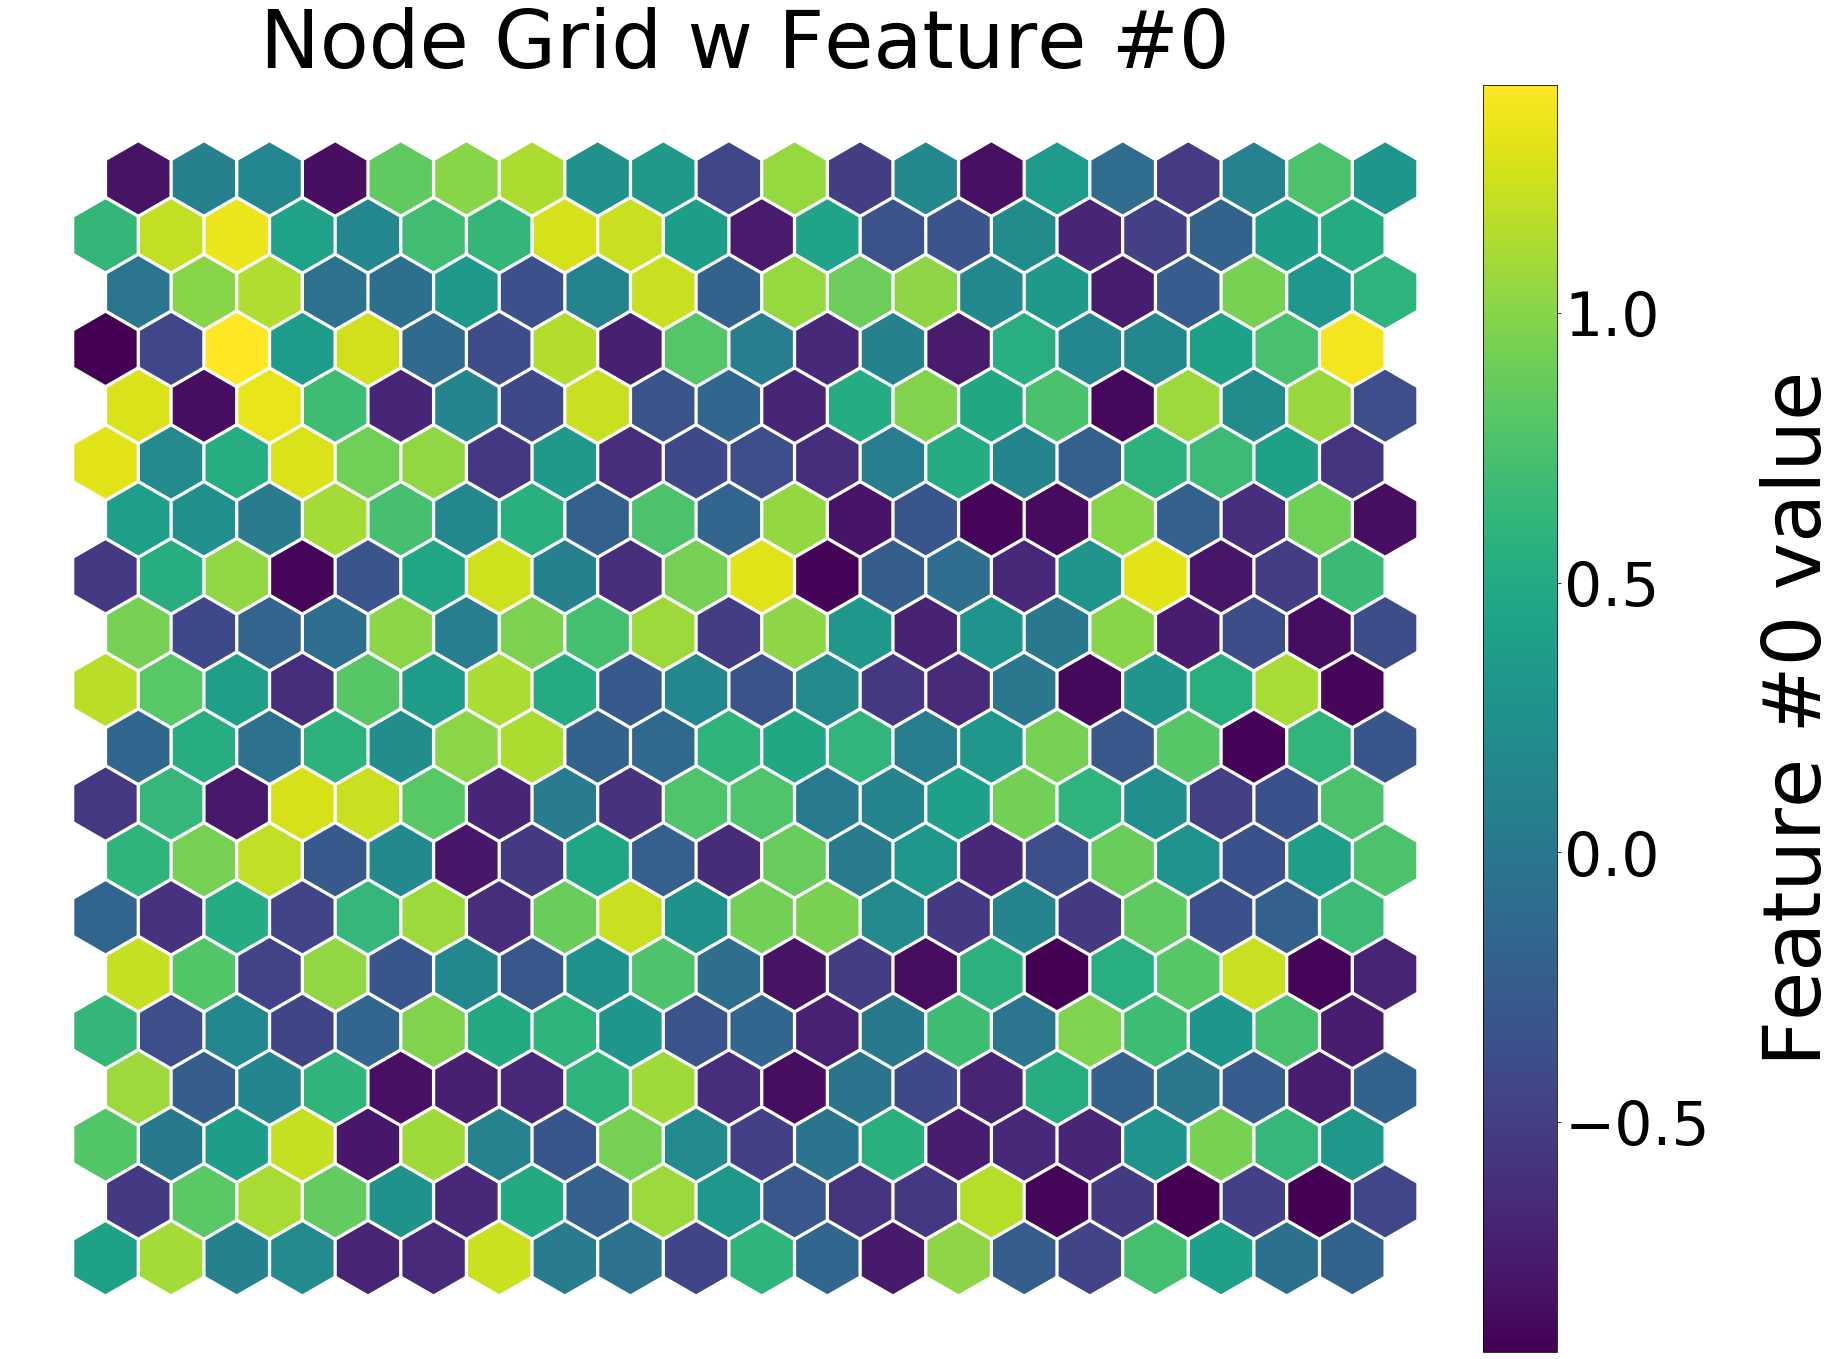

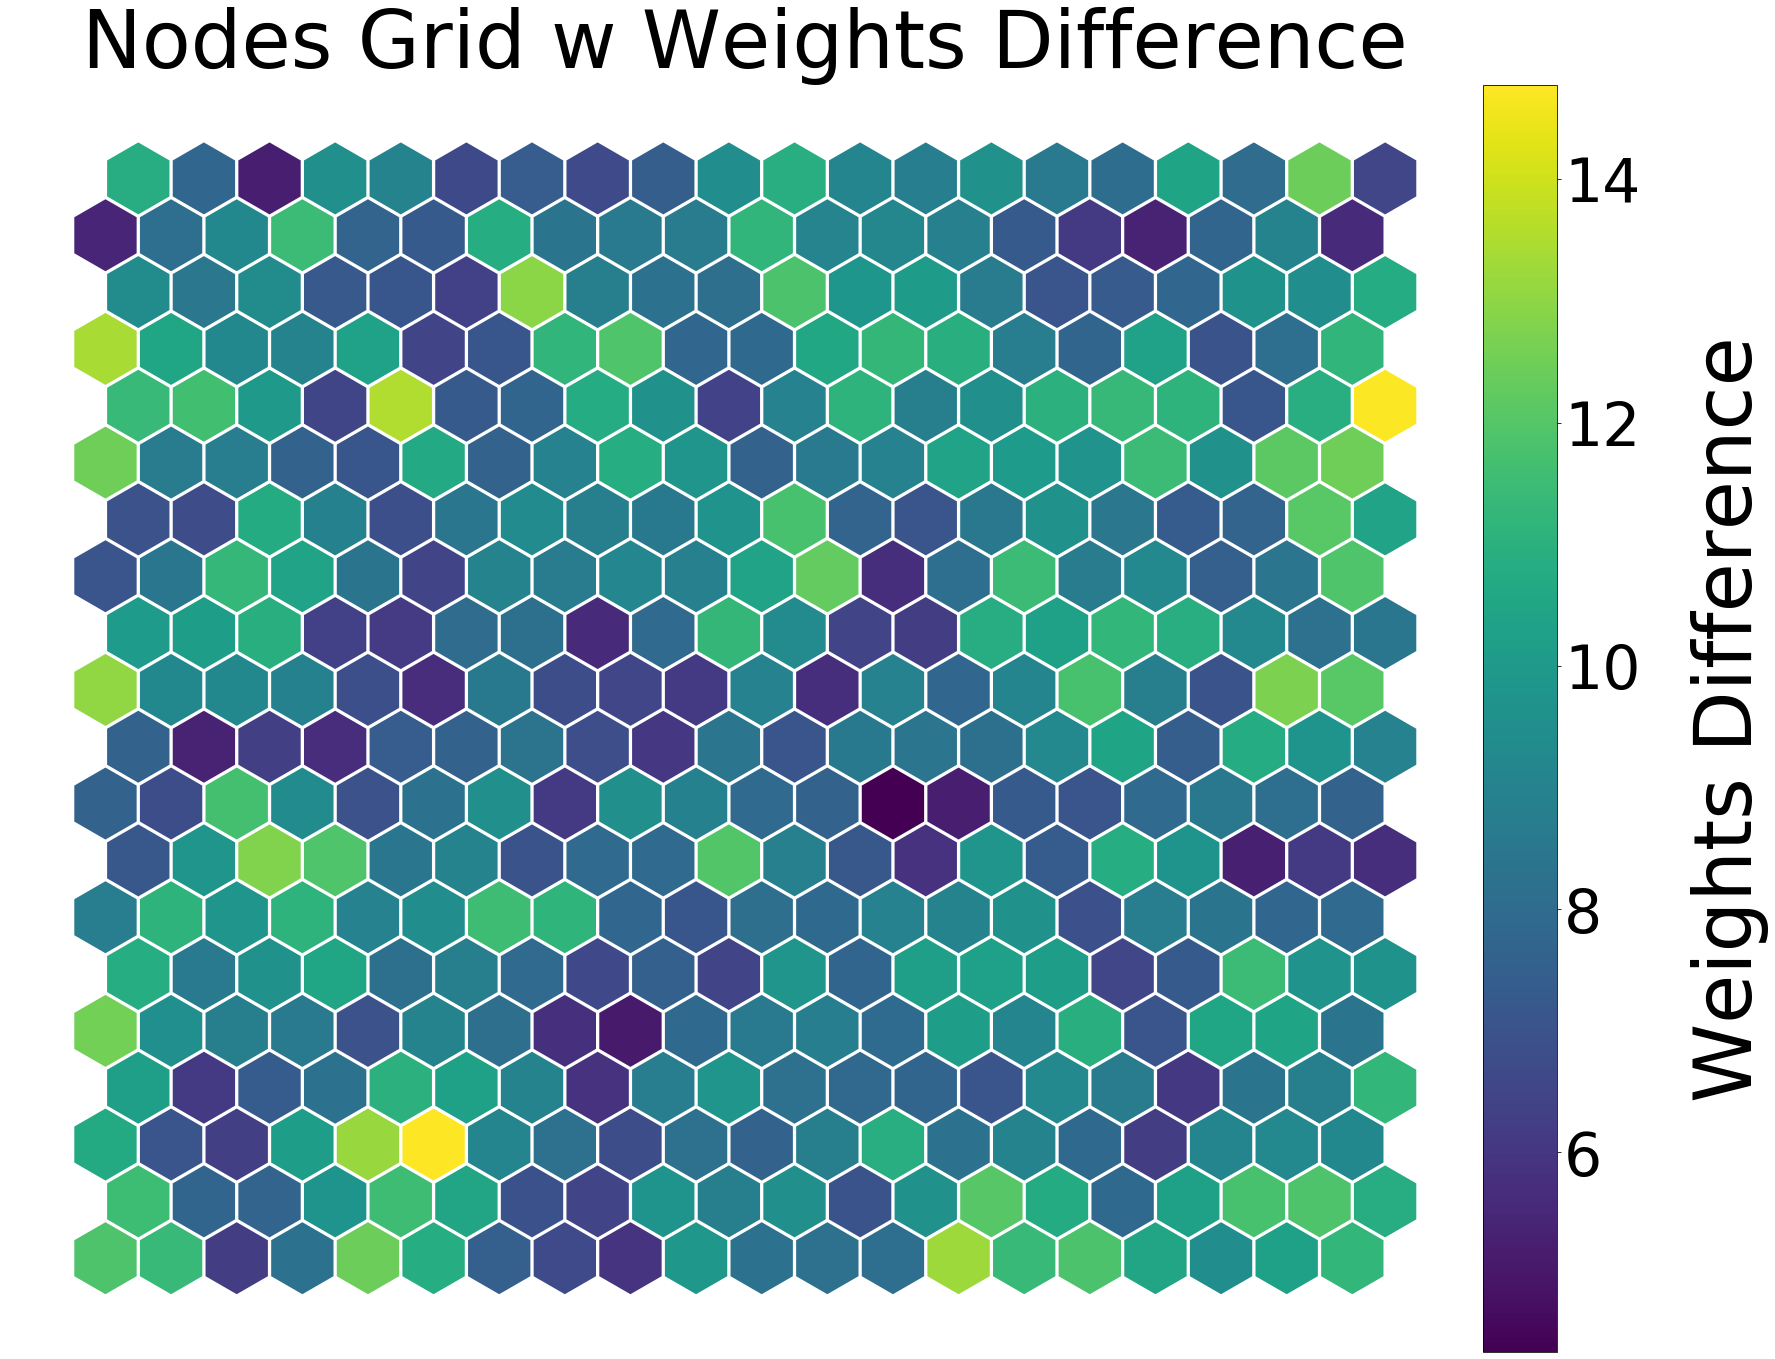

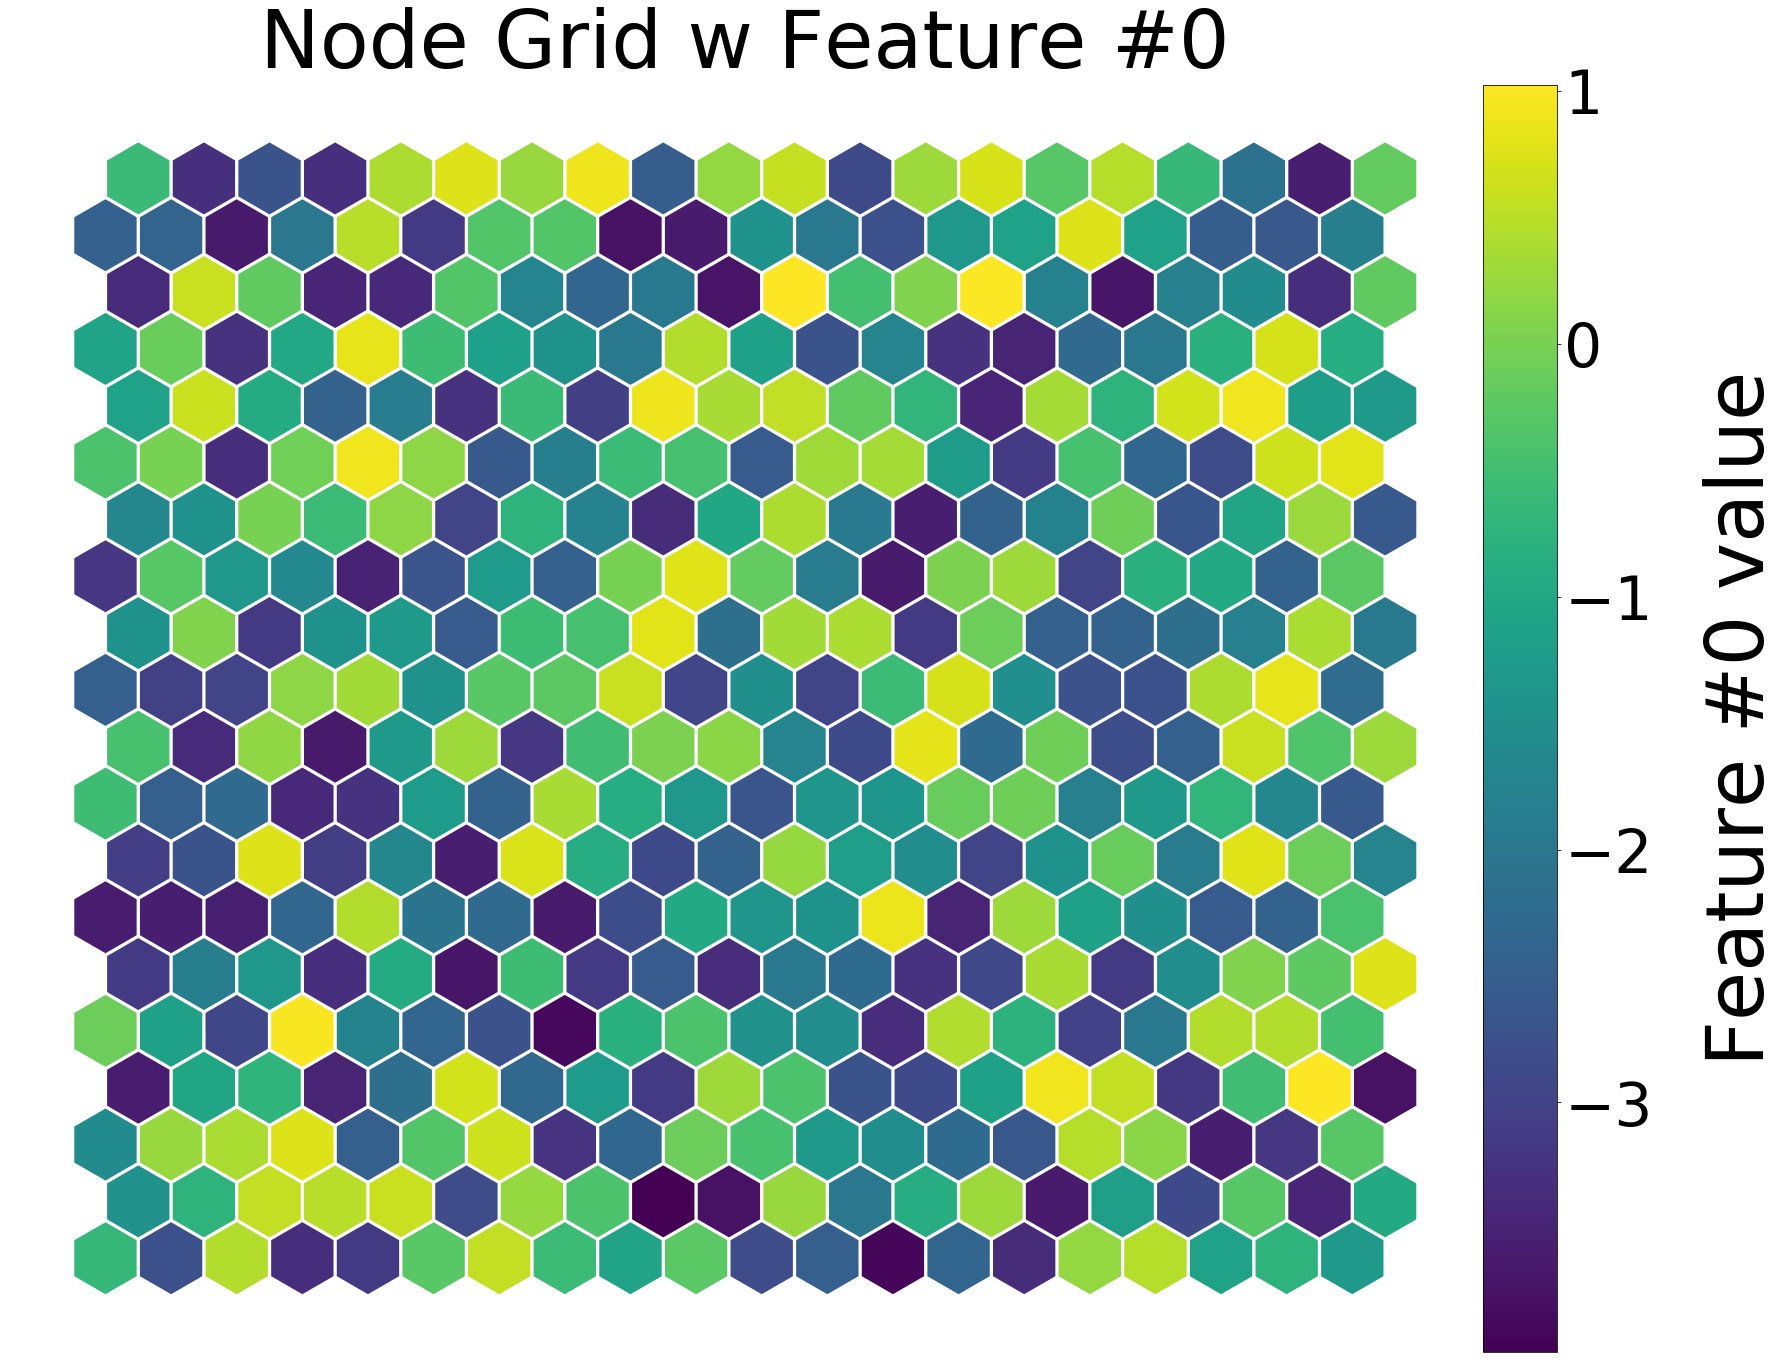

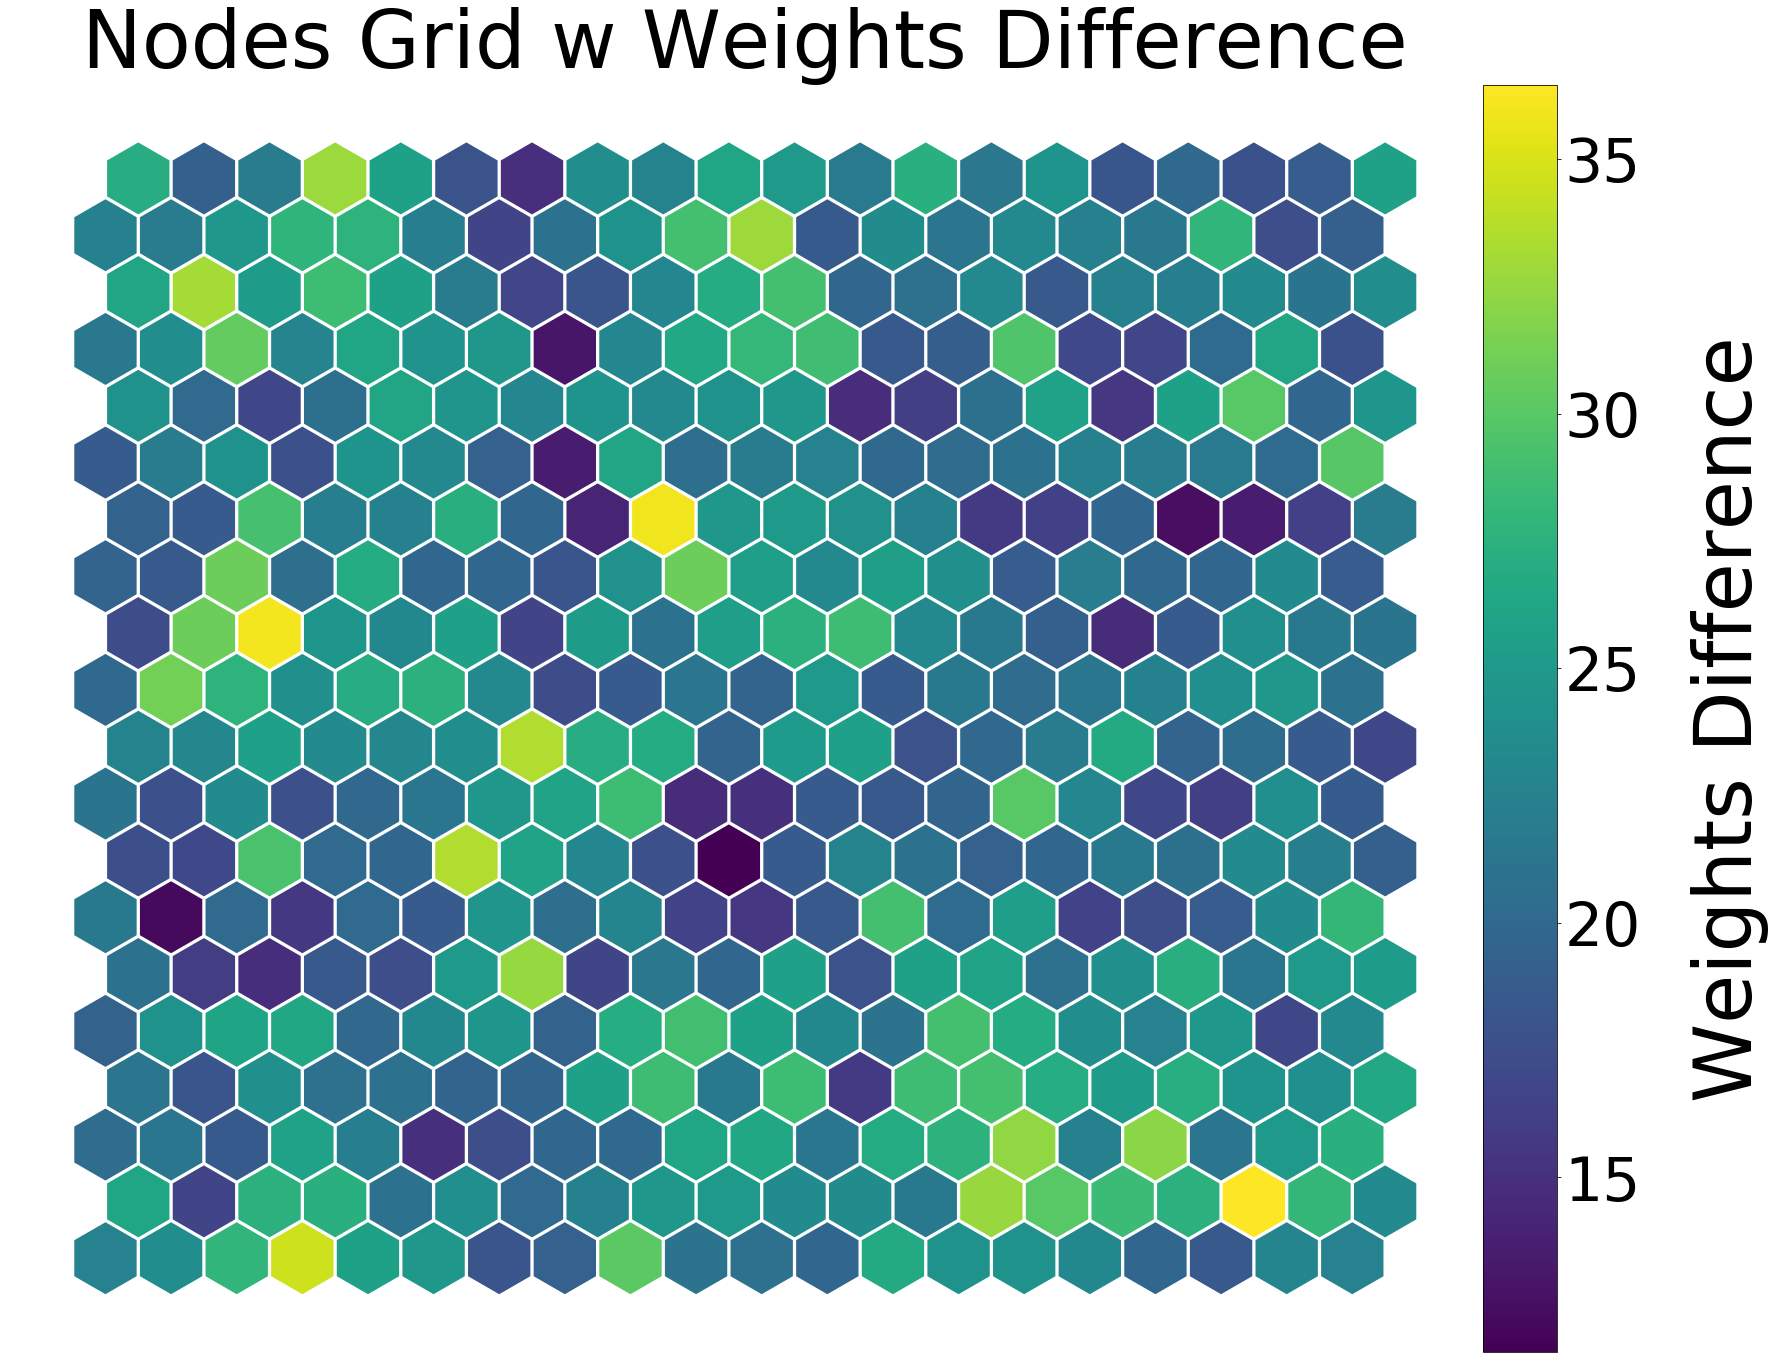

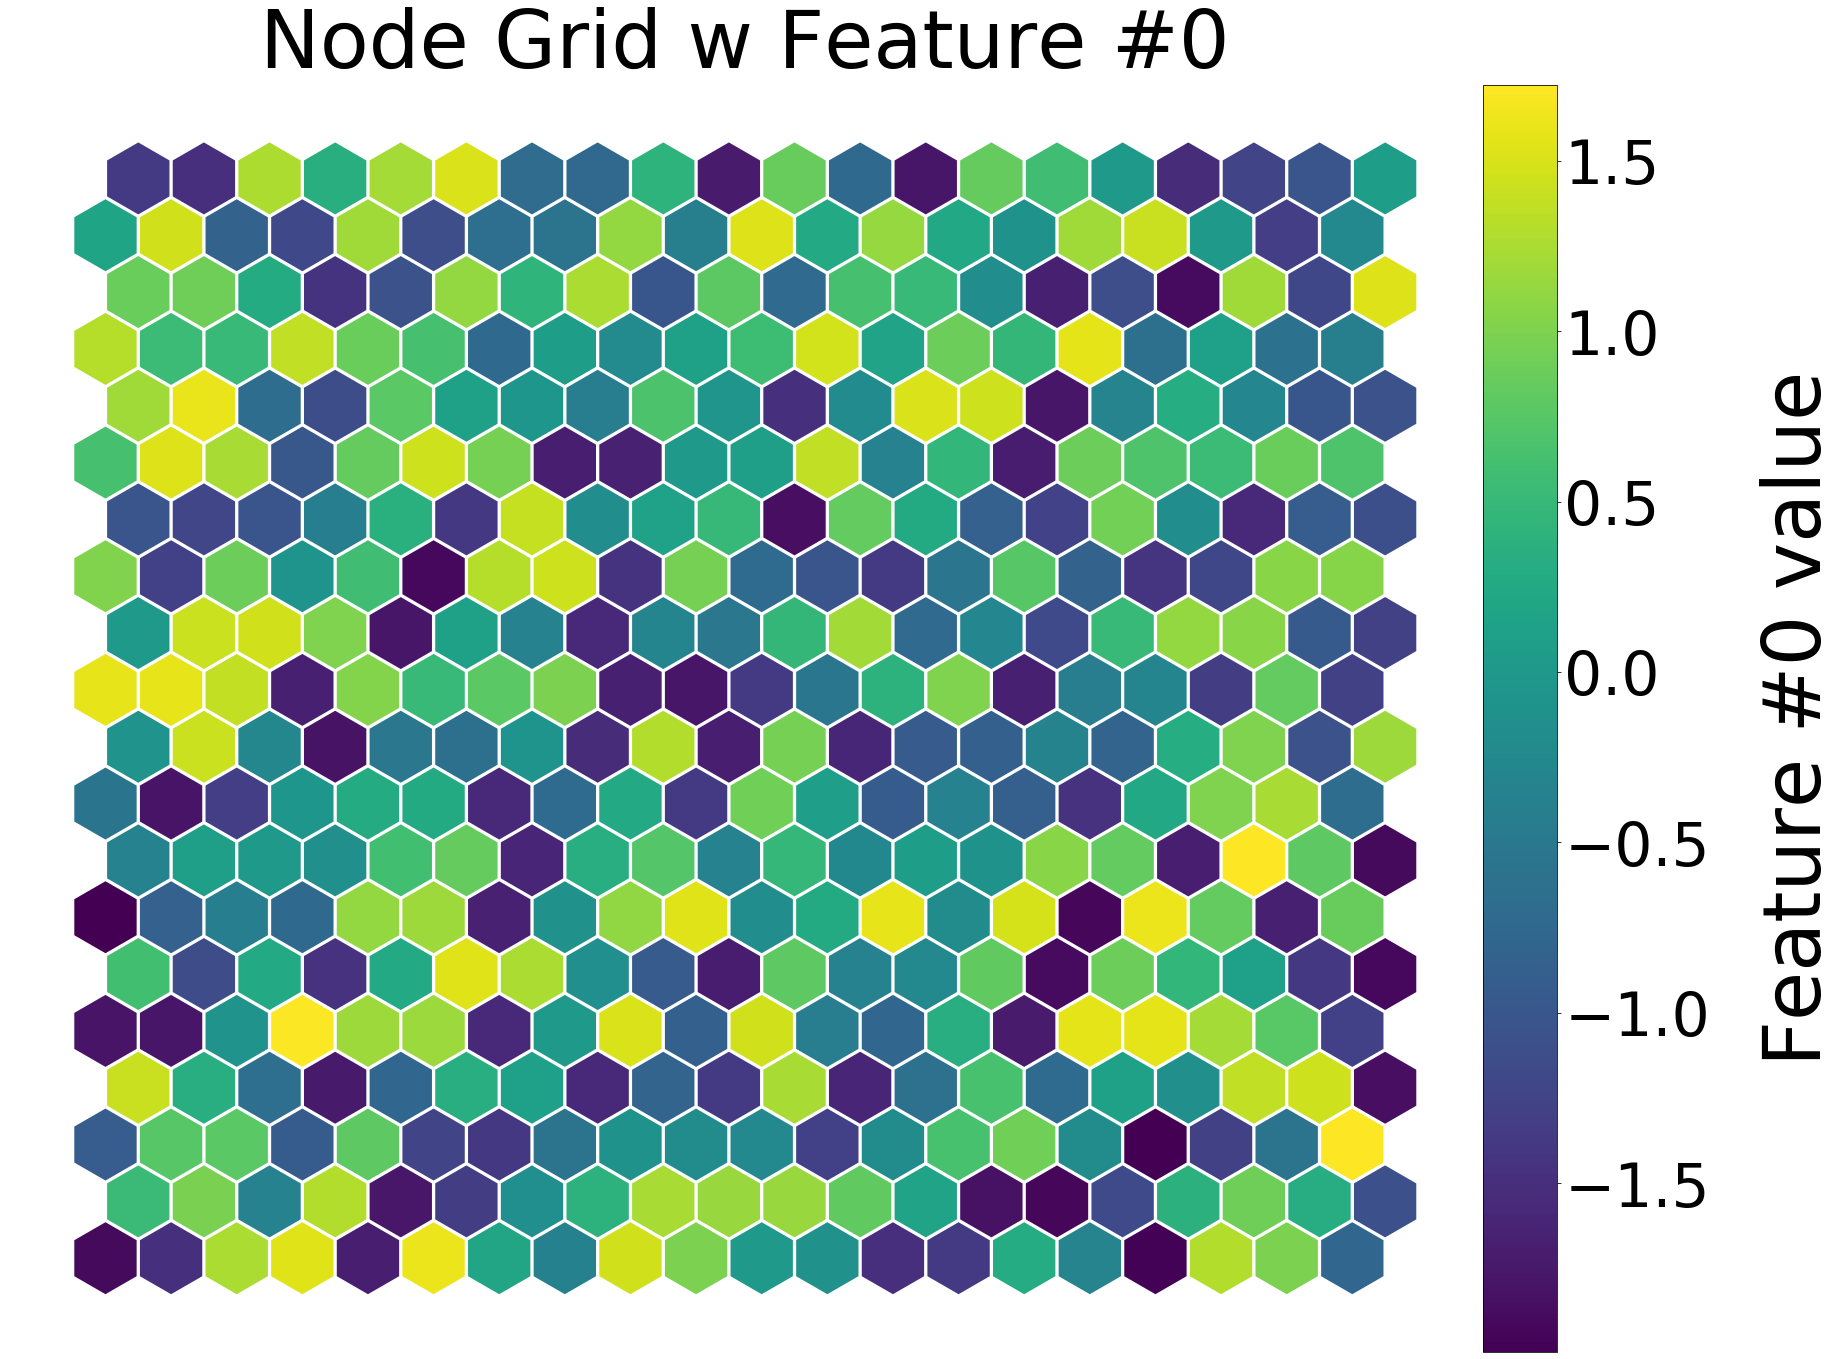

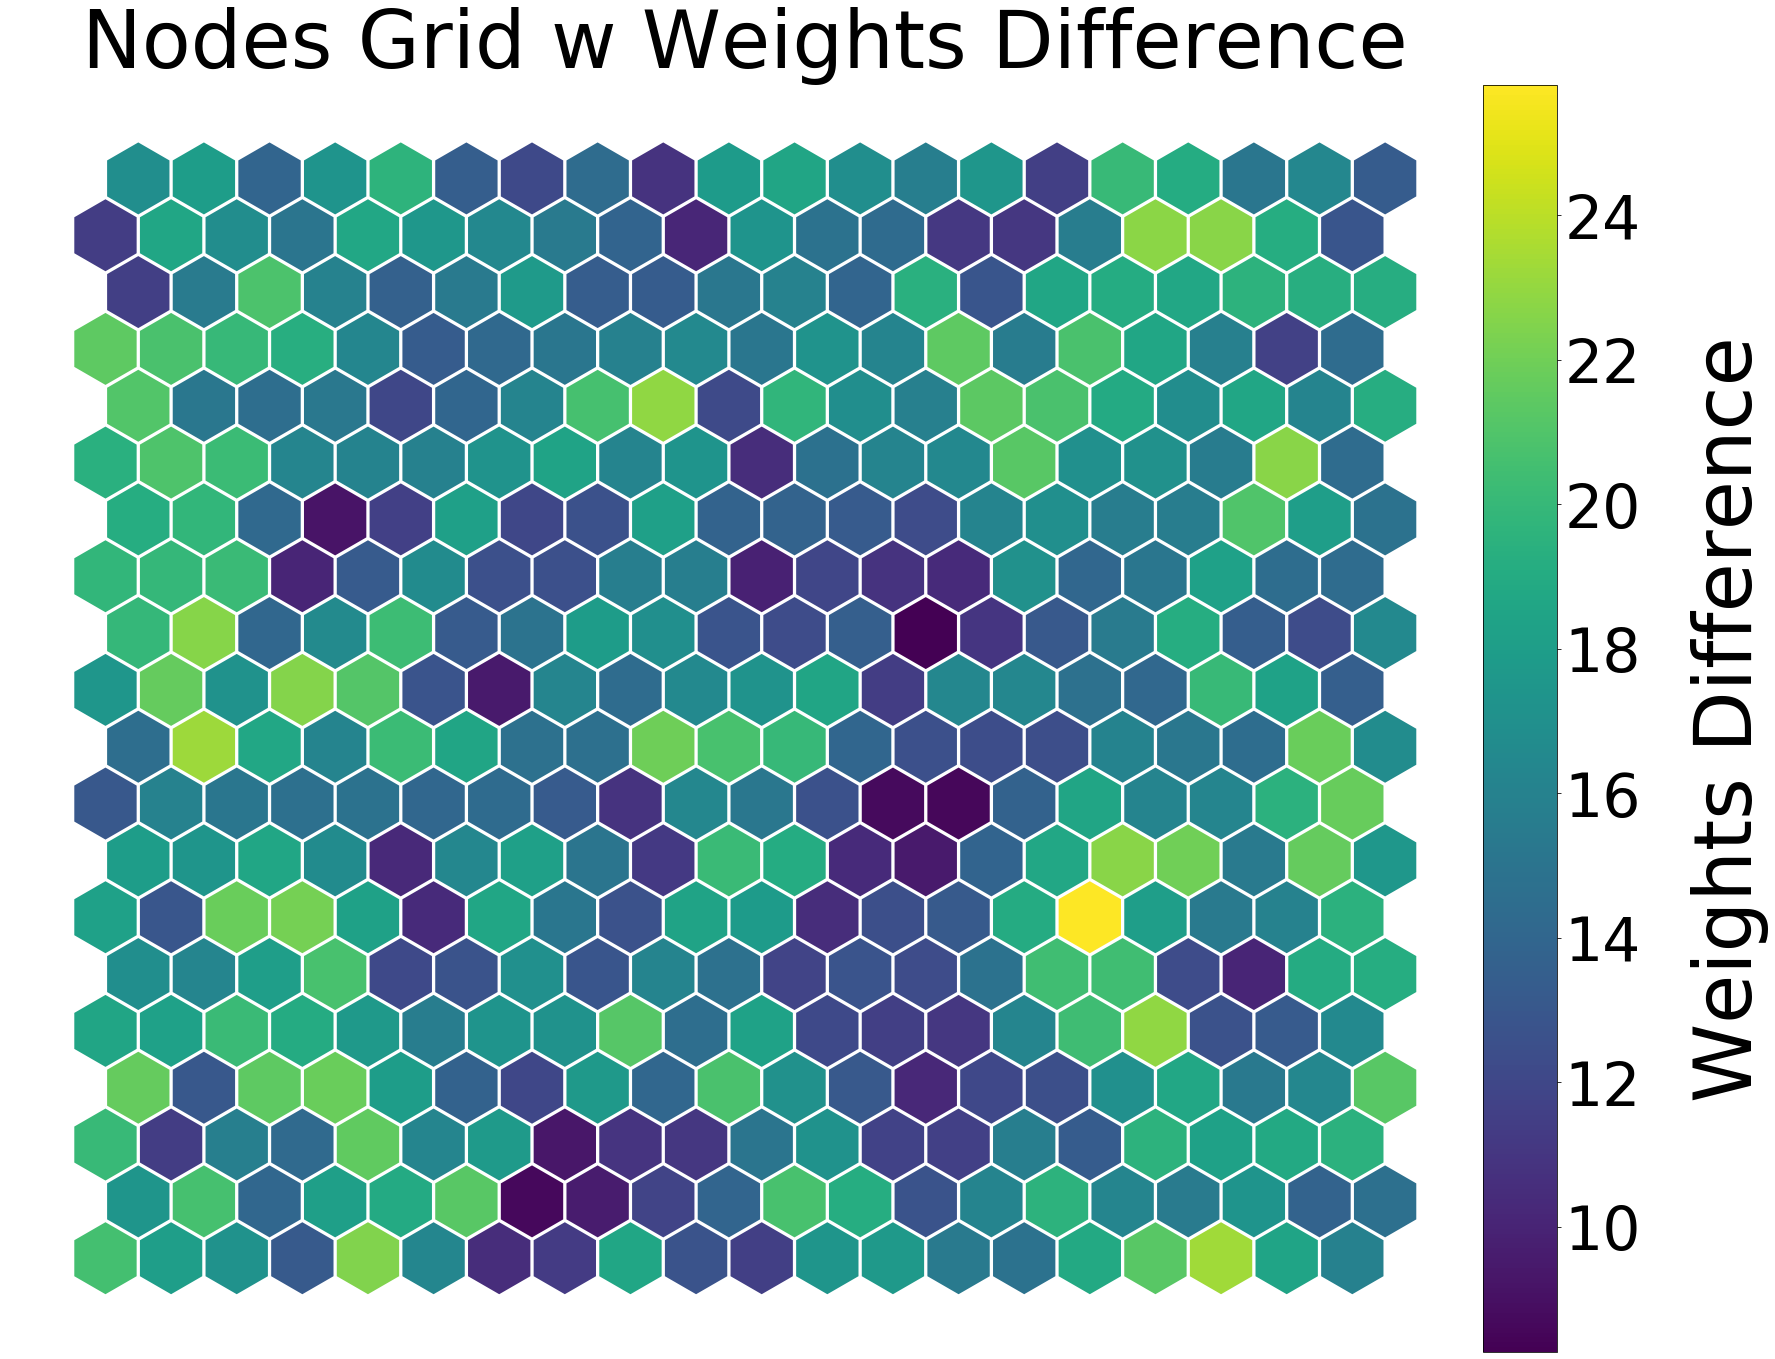

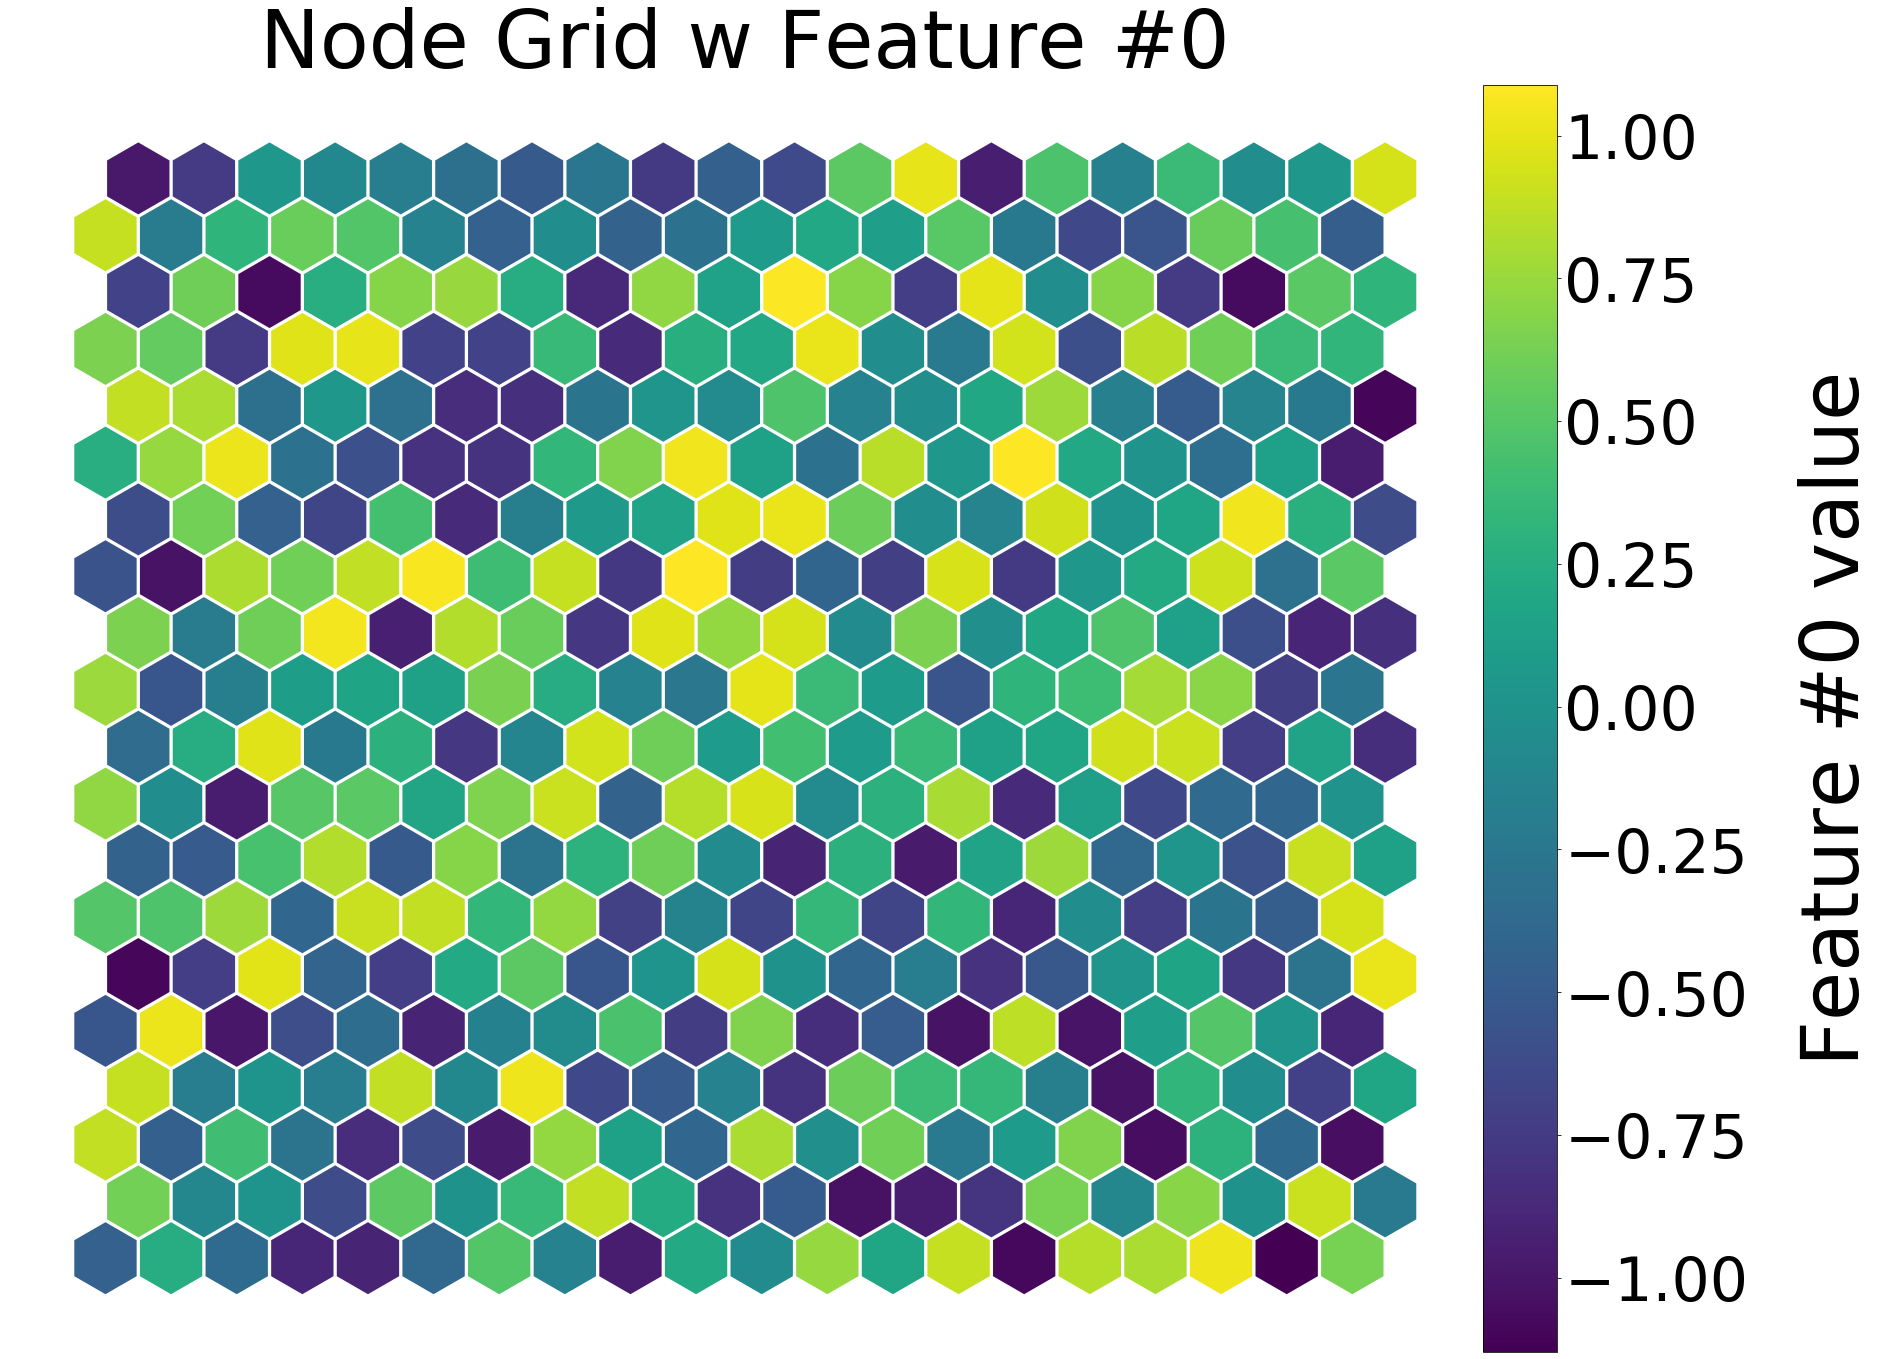

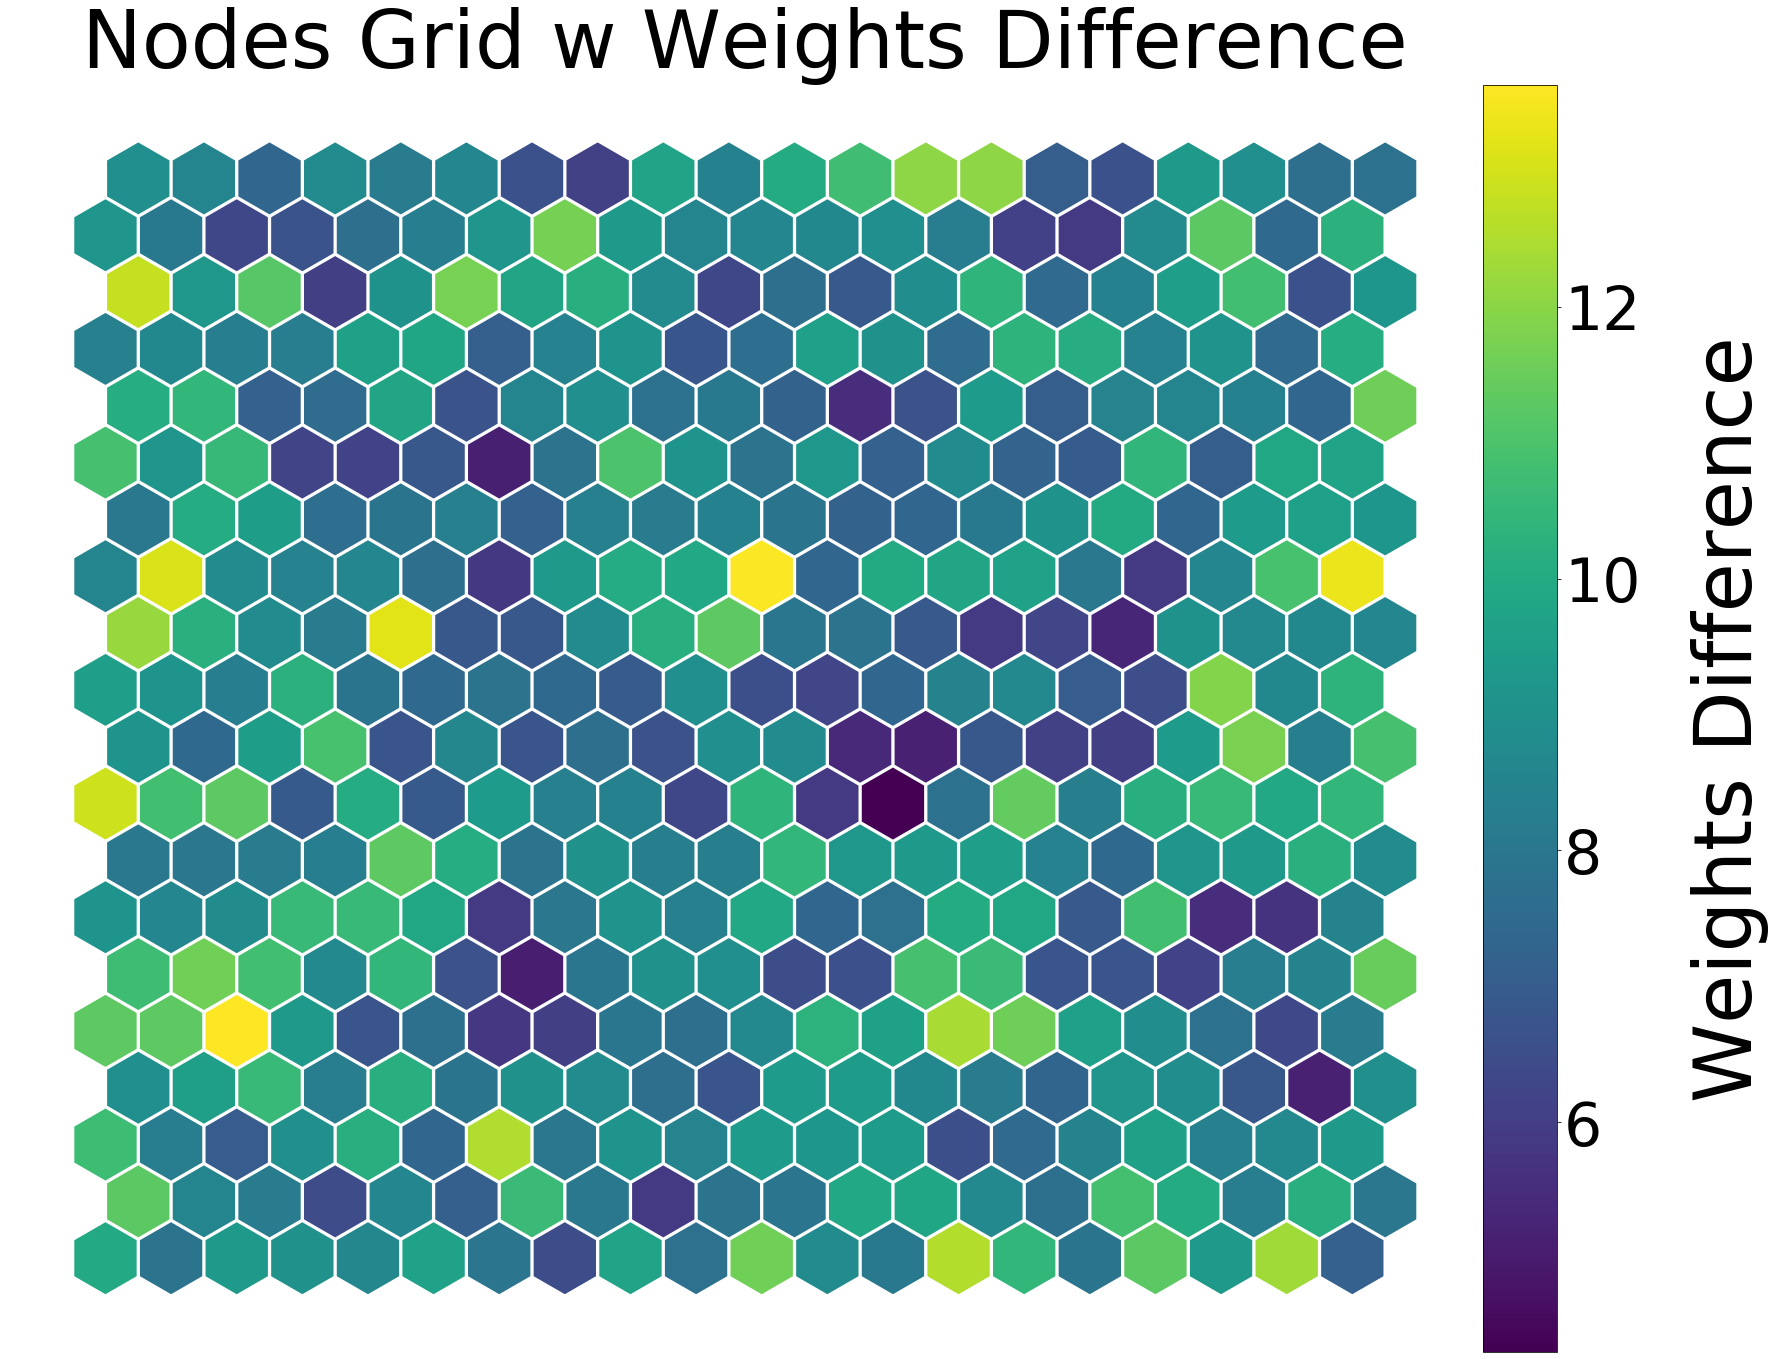

In [240]:
for i in im_paths:
    SOMmap(i)

*Solución Preguntas* 

1.	Si estoy satisfecho con la cuantización realizada con el atributo “net.nodes_graph” ya que me permite ver de manera resumida las distancian que hay entre los diferentes colores junto con sus pesos, como se puede apreciar en las graficas de cada una de las imágenes.
2.	Lastimosamente el método “net.cluster” que me permite ver los cluster y el método “net.project” no funcionaron ya que se quedaban procesando por al menos 3 horas y no encontré documentación al respecto, con “net.cluster” hubiera podido observar los clusters y con ellos, el cluster al que pertenece cada punto del cubo RGB ya con ese valor agrupo a todos los puntos que pertenecen al mismo cluster y le asigno un mismo color para luego usar la función “matrixtotensor” y reconstruyo la imagen con los nuevos colores para ver cuántos colores eran necesarios.
3.	La función de los mapas autoorganizados o redes de Khonen en este problema era que, dada una imagen y la concentración de color en dicha, utilizando su matriz, los colores muy parecidos estarán a una distancia corta, independiente su posición en la imagen, los mapas autoorganizados asignan “centroides” a esa concentración de puntos de colores cercanos sin importar su distribución.
4.	Fueron varios problemas, el primero fue instalando la librería que Sompy en Windows, ya que seguí los pasos que aparecían en el repositorio, pero al momento de importarla, no aparecía, y consulté con algunos compañeros y tampoco lo lograron, por lo que decidí utilizar SimpSOM que tiene menos documentación, es menos intuitiva y sus ejemplos no son tan claros. Además corriendo los métodos “net.cluster”  y “net.project” a pesar de que los deje 3 horas ininterrumpidas corriendo el código, no tuve resultado final.  
